# Data Wrangling - WeRateDogs

#### Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import string

## Coleta

1) Arquivo CSV previamente baixado:

In [2]:
# Carregando arquivo CSV fornecido para download e importando para um DataFrame.
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
len(twitter_archive_df)

2356

In [4]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2) Arquivo TSV baixado por programação:

In [5]:
# Baixando arquivo TSV do link fornecido
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [6]:
# Salvando o aquivo TSV no diretório.
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Carregando arquivo TSV e importando para um DataFrame.
# Usamos o mesmo método que lê CSV, porém colocamos o parâmetro sep = '\t'
# já que é um arquivo que os dados são separados por tabulação, e assim é possível ler o TSV.
image_predictions_df = pd.read_csv('image_predictions.tsv', sep = '\t')

In [8]:
len(image_predictions_df)

2075

In [9]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3) Obtenção da contagem de curtidas e favoritos pela API do twitter:

In [10]:
# Definindo chaves de acesso (Insira suas chaves)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [11]:
# Obtendo acesso à API
# As configurações de wait_on_rate_limit e wait_on_rate_limit_notify alteradas para True devido ao limite de taxa
# de consulta do twitter.
# E o parser setamo
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [12]:
# Obtém todos tweet_ids de twitter_archive_df
ta_df_id_list   = list(twitter_archive_df.tweet_id)
# Obtém todos tweet_ids de image_predictions_df
ip_df_id_list    = list(image_predictions_df.tweet_id)
# Calcula a União de ambas as listas, garantindo que caso existam ids 
# em uma que não esteja na outra, eles também serão buscados.
tweet_id_list = list(set(ta_df_id_list) | set(ip_df_id_list))

In [13]:
file_name = "tweet_json.txt"
line_break = "\n"

Para executar o bloco abaixo, remova os comentários. Deixei-os comentados já que o arquivo txt já foi criado em sua primeira execução e para evitar o reprocessamento do mesmo ao executar todos os blocos.

In [14]:
errors = []
file = open(file_name,"w")
# Itera sobre a lista de ids e busca os tweets
for i in range(0, len(tweet_id_list) -1):
    if i % 100 == 0:
        print("Reached index",i, "out of", len(tweet_id_list) -1)
    try:
        tweet_dict = {}
        tweet_info = api.get_status(tweet_id_list[i])._json
        tweet_dict["tweet_id"]       = tweet_id_list[i]
        tweet_dict["retweet_count"]  = tweet_info["retweet_count"]
        tweet_dict["favorite_count"] = tweet_info["favorite_count"]
        tweet_json = json.dumps(tweet_dict)
        # Escreve o json no arquivo e quebra a linha.
        file.write(tweet_json+line_break)
    except Exception as e:
        errors.append((tweet_id_list[i], e))
file.close()

Caso queira averiguar a quantidade de erros (tweets deletados), execute **len(errors)**

In [14]:
# Abre o arquivo 'tweet_json.txt' e faz a leitura
file = open(file_name, 'r') 
json = file.read()

# Lê o json linha por linha, e o coloca em um DataFrame
tweet_json_df = pd.read_json(json, lines=True)

file.close()

In [15]:
tweet_json_df.head()

,favorite_count,retweet_count,tweet_id
0,24559,4066,891815181378084864
1,38012,8312,892420643555336193
2,39532,9157,891327558926688256
3,41365,8456,891689557279858688
4,11612,2018,890971913173991426


In [16]:
len(tweet_json_df)

2339

## Acesso

In [17]:
# Comparando o tamanho dos dataframes:
len(twitter_archive_df), len(image_predictions_df), len(tweet_json_df)

(2356, 2075, 2339)

Podemos notar que existem quantidades de linhas diferentes em cada um dos arquivos.<br>
Quando coletamos os ids para obter *tweet_json_df*, verificamos que a união dos tweet_ids de *twitter_archive_df* e *image_predictions_df* tinha a mesma quantidade de elementos que os tweets de *twitter_archive_df*.<br> 
Por associação, todos os tweet_ids de *tweet_json_df* também estão em *twitter_archive_df*, mas não necessariamente em *image_predictions_df*.<br>
Nesse sentido, sabemos que **281** twitter_ids estão em *twitter_archive_df* e não estão em *image_predictions_df*.<br>
Sabemos também que **17** twitter_ids estão em *twitter_archive_df* e não estão em *tweet_json_df* pois foram tweets deletados.<br>
Vamos fazer a intersecção dos tweet_ids para verificar quais são os ids que estão presente nos 3.

In [18]:
ta_df_id_list      = list(twitter_archive_df.tweet_id)
ip_df_id_list      = list(image_predictions_df.tweet_id)
tj_df_id_list      = list(tweet_json_df.tweet_id)
intersect_list     = set(ta_df_id_list).intersection(ip_df_id_list).intersection(tj_df_id_list)

In [19]:
len(intersect_list)

2066

Temos então **2066** tweet_ids que estão presentes em todos os três DataFrames.

In [20]:
in_tj_off_ip = len(set(tj_df_id_list) - set(ip_df_id_list))
in_ip_off_tj = len(set(ip_df_id_list) - set(tj_df_id_list))
in_tj_off_ip, in_ip_off_tj

(273, 9)

Verificamos também que **273** dos tweets buscados pela API não possuem predição de imagem, e que **9** tweets que tiveram predições de imagem já foram deletados.

### twitter_archive_df

In [21]:
# Verificando o preenchimento das colunas
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
# Verificando se existe algum tweet_id duplicado
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1910,674416750885273600,NaN,NaN,2015-12-09 02:34:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jonah. He's a Stinted Fisher Price. En...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674416750...,10,10,Jonah,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,341021133.0,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
874,761292947749015552,NaN,NaN,2016-08-04 20:09:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None


Todos 2356 rating_denominators parecem ser **10** pelos exemplos que busquei, verificarei se a coluna é necessária ao verifiar se algum deles é diferente de **10**, e se sim, descobrir o motivo.

In [24]:
different_rating_denominators = twitter_archive_df[twitter_archive_df.rating_denominator != 10]

In [25]:
pd.set_option('display.max_colwidth', -1) # Para mostrar todo o texto
different_rating_denominators[['tweet_id', 'text','rating_numerator', 'rating_denominator', 'in_reply_to_status_id', 'retweeted_status_id']]

,tweet_id,text,rating_numerator,rating_denominator,in_reply_to_status_id,retweeted_status_id
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,8.352460e+17,NaN
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,8.320875e+17,NaN
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,NaN,NaN
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,NaN,NaN
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,NaN,7.403732e+17
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,NaN,NaN
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,NaN,NaN
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,NaN,NaN
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN,NaN
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,NaN,NaN


Os valores de *rating_denominator* e *rating_numerator* estão inesperados, em alguns casos *rating_numerator* está menor que o *rating_denominator*, o que vai contra o ideia da página de sempre classificá-los acima da nota mais alta pois são 'bons garotos'. Pelo texto conseguimos verificar que algumas notas são relacionadas a mais de um cachorro, também existe referencia à datas que são mencionadas antes das notas ou referencias a expressões.

Para as linhas que possuem *in_reply_to_status_id* ou *retweeted_status_id* não analisaremos pois elas serão removidas por se tratarem de comentários ou retweets e serão deletadas.<br><br>
Nos ids **820690176645140481, 758467244762497024, 731156023742988288, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288, 684222868335505415, 677716515794329600, 675853064436391936** o fato da nota base ser mais alta é em relação a quantidade de cachorros que possuem na imagem, se a imagem possui 7 cachorros, então seu *rating_denominator* será 70 (10 para cada).<br><br>
No id **810984652412424192** não possui avaliação real, foi apenas uma menção de 24/7 de que o cachorro sorri 24 horas em todos 7 dias da semana.<br><br>
Em **740373189193256964** pelo texto podemos verificar que era para ser 14/10, mas a data 9/11 do desastre foi interpretada como nota.<br><br>
Em **722974582966214656** 4/20 foi uma piada se referindo a 4:20, pelo texto podemos verificar que deveria ser 13/10.<br><br>
Em **716439118184652801** 50/50 se refere a divisão de parcelas, enquanto a nota 13/10 segue a frente.<br><br>
Em **682962037429899265** o termo 7/11 foi interpretado antes da nota 10/10.<br><br>
Em **666287406224695296** o termo 1/2 foi interpretado antes da nota 9/10.

In [26]:
twitter_archive_df.query("(doggo == 'doggo' and floofer == 'floofer') or (doggo == 'doggo' and pupper == 'pupper') or (doggo == 'doggo' and puppo == 'puppo') or (floofer == 'floofer' and pupper == 'pupper') or (floofer == 'floofer' and puppo == 'puppo') or (pupper == 'pupper' and puppo == 'puppo')")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [27]:
twitter_archive_df.info(),
twitter_archive_df.doggo.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None     2259
doggo    97  
Name: doggo, dtype: int64

As colunas *doggo*, *floofer*, *pupper* e *puppo* estão constando que não possuem objetos nulos, porém estão preenchidas como **None**.

In [28]:
twitter_archive_df.info(),
twitter_archive_df.name.value_counts().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None       745
a          55 
Charlie    12 
Oliver     11 
Cooper     11 
Lucy       11 
Lola       10 
Penny      10 
Tucker     10 
Bo         9  
Winston    9  
the        8  
Sadie      8  
Daisy      7  
Buddy      7  
Bailey     7  
an         7  
Toby       7  
Koda       6  
Oscar      6  
Name: name, dtype: int64

Nomes estanhos apresentados na coluna *name*, como 'a', 'an', 'the', e o caso que já vimos na coluna anterior 'None'. A coluna não apresenta valores nulos.

### image_predictions_df

In [29]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True


In [31]:
len(image_predictions_df.query("p1_dog == False and p2_dog == True"))

155

In [32]:
len(image_predictions_df.query("p1_dog == False and p2_dog == False and p3_dog == True"))

64

In [33]:
len(image_predictions_df.query("p1_dog == False and p2_dog == False and p3_dog == False"))

324

Só iremos obter a previsão mais confiável caso seja um cachorro, então seria viável considerar p2 se p1_dog for falso, considerar p3 se p1_dog e p2_dog forem falsos e anular o valor se p1_dog, p2_dog e p3_dog forem falsos.
Assim podemos armazenar apenas a previsão de raça de cachorro mais confiável e sua respectiva confiabilidade em cada imagem.

In [34]:
image_predictions_df.p1.nunique(), image_predictions_df.p1.str.lower().nunique()

(378, 378)

In [35]:
image_predictions_df.p2.nunique(), image_predictions_df.p2.str.lower().nunique()

(405, 404)

Existe um erro de padronização de texto.

In [36]:
image_predictions_df.p3.nunique(), image_predictions_df.p3.str.lower().nunique()

(408, 408)

In [37]:
# Verificando se existe algum tweet_id duplicado
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### tweet_json_df

In [38]:
tweet_json_df.sample(5)

,favorite_count,retweet_count,tweet_id
812,11715,2904,810657578271330305
1658,4039,1070,758474966123810816
700,4018,471,837482249356513284
870,9499,2359,816091915477250048
2127,3076,1000,683357973142474752


In [39]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


Não é necessário verificar valores para *tweet_id* repetidos, pois vieram da união dos outros dois dataframes, que não possuem *tweet_ids* repetidos.

### Qualidade
#### Geral
- Postagens que não contenham imagens precisam ser removidas.
- Postagens que já foram deletadas precisam ser removidas.
- Ao final, quando a arrumação estiver feita, as colunas *source, text, expanded_urls* não terão mais uso, *source* e *expanded url* são de difícil leitura e *text* já terá sido previamente utilizado nas análises.

#### twitter_archive_df
- Retweets e tweets resposta precisam ser removidos, apenas as postagens originais devem ser consideradas.
- Colunas relativas a retweets e respostas não são necessárias (*in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*).
- O tipo de dado do *timestamp* está errado.
- Trocar tipos das colunas *doggo*, *floofer*, *pupper* e *puppo* para booleanos, não podemos mesclá-los em uma coluna apenas pois algumas linhas apresentam dois tipos.
- A coluna de *name* em muitos casos está preenchida incorretamente com 'None' (assim como no item anterior), 'a', 'an', 'the'. A coluna não apresenta entradas vazias.
- Para os campos *rating_denominator* e *rating_numerator* deverão ser corrigidos os casos encontrados.
- tweet_id deveria ser uma string, para evitar possíveis falhas de omissão do(s) primeiro(s) caracteres caso sejam zero (0) ou para o comportar um limite maior de caracteres.

#### image_predictions_df
- Nomes de colunas não intuitivos.
- Utilizar apenas uma coluna de raça e confiabilidade de previsão. (Apenas quando pX_dog for verdadeiro e para X sendo o menor número, o mais confiável).
- Padronizar nome das raças.
- Trocar raça para categoria.
- tweet_id deveria ser uma string.

#### tweet_json_df
- tweet_id deveria ser uma string.

### Arrumação
- As duas colunas *rating_denominator* e *rating_numerator* podem ser convertidas em apenas uma.
- A quantidade de linhas é diferente em cada DataFrame.
- Só é necessária um DataFrame (tabela) que contenha os dados relevantes dos três DataFrames.

## Limpeza

Cópia de cada DataFrame para fazer a limpeza 

In [40]:
twitter_archive_cln   = twitter_archive_df.copy()

In [41]:
image_predictions_cln = image_predictions_df.copy()

In [42]:
tweet_json_cln        = tweet_json_df.copy()

### twitter_archive_cln

#### Definição
- Removeremos todas as linhas que não possuírem os campos *in_reply_to_status_id* e *retweeted_status_user_id* como nulos, pois se tratam de retweets ou comentários.
- Eliminar as colunas *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* e *retweeted_status_timestamp* do dataframe, pois não serão mais necessárias.

#### Código

In [43]:
# Mantém apenas as colunas em que 'in_reply_to_status_id' e 'retweeted_status_id' são nulos.
twitter_archive_cln = twitter_archive_cln[twitter_archive_cln.in_reply_to_status_id.isnull()]
twitter_archive_cln = twitter_archive_cln[twitter_archive_cln.retweeted_status_id.isnull()]
# Remove as colunas que não são mais necessárias.
twitter_archive_cln.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id',
    'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True, axis = 1)

#### Teste

In [44]:
twitter_archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Definição
- Nas colunas *doggo*, *floofer*, *pupper* e *puppo* trocar valores 'None' para False e valores com o nome da coluna para True.

#### Código

In [45]:
twitter_archive_cln["doggo"].replace("None", False, inplace = True)
twitter_archive_cln["doggo"].replace("doggo", True, inplace = True)

twitter_archive_cln["floofer"].replace("None", False, inplace = True)
twitter_archive_cln["floofer"].replace("floofer", True, inplace = True)

twitter_archive_cln["pupper"].replace("None", False, inplace = True)
twitter_archive_cln["pupper"].replace("pupper", True, inplace = True)

twitter_archive_cln["puppo"].replace("None", False, inplace = True)
twitter_archive_cln["puppo"].replace("puppo", True, inplace = True)

#### Teste

In [46]:
twitter_archive_cln.sample(5)[["tweet_id", "doggo", "floofer", "pupper", "puppo"]]

,tweet_id,doggo,floofer,pupper,puppo
1103,735256018284875776,True,False,False,False
1020,746757706116112384,False,False,False,False
987,749036806121881602,False,False,False,False
1197,717009362452090881,False,False,True,False
31,886258384151887873,False,False,False,False


In [47]:
twitter_archive_cln.doggo.value_counts()

False    2014
True     83  
Name: doggo, dtype: int64

In [48]:
twitter_archive_cln.floofer.value_counts()

False    2087
True     10  
Name: floofer, dtype: int64

In [49]:
twitter_archive_cln.pupper.value_counts()

False    1867
True     230 
Name: pupper, dtype: int64

In [50]:
twitter_archive_cln.puppo.value_counts()

False    2073
True     24  
Name: puppo, dtype: int64

In [51]:
twitter_archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null bool
floofer               2097 non-null bool
pupper                2097 non-null bool
puppo                 2097 non-null bool
dtypes: bool(4), int64(3), object(5)
memory usage: 155.6+ KB


#### Definição
- Com a função to_datetime, troca o tipo da coluna *timestamp* de 'object' para 'datetime'

#### Código

In [52]:
twitter_archive_cln.timestamp = pd.to_datetime(twitter_archive_cln.timestamp, infer_datetime_format=True)

#### Teste

In [53]:
twitter_archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null bool
floofer               2097 non-null bool
pupper                2097 non-null bool
puppo                 2097 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(3), object(4)
memory usage: 155.6+ KB


#### Definição
- Na coluna *name* trocar valores 'None' e palavras como 'the', 'a', 'an' por np.nan. Utilizaremos stopwords de nltk para verificar estas palavras.

#### Código

In [54]:
from nltk.corpus import stopwords
stopwords_to_remove = stopwords.words("english")

In [55]:
twitter_archive_cln["name"].replace("None", np.nan, inplace = True)
for word in stopwords_to_remove:
    twitter_archive_cln["name"].replace(word, np.nan, inplace = True)

#### Teste

In [56]:
twitter_archive_cln.info(),
twitter_archive_cln.name.value_counts().head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1410 non-null object
doggo                 2097 non-null bool
floofer               2097 non-null bool
pupper                2097 non-null bool
puppo                 2097 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(3), object(4)
memory usage: 155.6+ KB


Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny      9 
Tucker     9 
Sadie      8 
Lola       8 
Winston    8 
Toby       7 
Daisy      7 
Bella      6 
Koda       6 
Bailey     6 
Bo         6 
Stanley    6 
Oscar      6 
Jax        6 
Bentley    5 
Louis      5 
Name: name, dtype: int64

#### Definição
- Substituir os valores de *rating_numerator* e *rating_denominator* encontrados manualmente
  - Remover a linha do *tweet_id* **810984652412424192** pois não possui avaliação real.
  - No *tweet_id* = **740373189193256964** corrigiremos 9/11 para 14/10
  - No *tweet_id* = **722974582966214656** corrigiremos 4/20 para 13/10
  - No *tweet_id* = **716439118184652801** corrigiremos 50/50 para 13/10
  - No *tweet_id* = **682962037429899265** corrigiremos 7/11 para 10/10
  - No *tweet_id* = **666287406224695296** corrigiremos 1/2 para 9/10

#### Código

In [57]:
# Remove o id 810984652412424192
twitter_archive_cln = twitter_archive_cln[twitter_archive_cln.tweet_id != 810984652412424192]

In [58]:
# Atualiza os valores que estavam errados
twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 740373189193256964, 'rating_denominator'] = 10

twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 722974582966214656, 'rating_denominator'] = 10

twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 716439118184652801, 'rating_numerator'] = 13
twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 716439118184652801, 'rating_denominator'] = 10

twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 682962037429899265, 'rating_denominator'] = 10

twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_cln.loc[twitter_archive_cln.tweet_id == 666287406224695296, 'rating_denominator'] = 10

#### Teste
- Apenas os ids **820690176645140481, 758467244762497024, 731156023742988288, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288, 684222868335505415, 677716515794329600, 675853064436391936** devem ser mostrados

In [59]:
twitter_archive_cln[twitter_archive_cln.rating_denominator != 10][['tweet_id', 'text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


#### Definição
- Criar uma coluna *rating* que será a divisão de *rating_numerator* por *rating_denominator* e então removeremos as colunas utilizadas na conta.

#### Código

In [60]:
twitter_archive_cln['rating'] = twitter_archive_cln.rating_numerator / twitter_archive_cln.rating_denominator
twitter_archive_cln.drop(['rating_numerator', 'rating_denominator'], inplace = True, axis = 1)

In [61]:
twitter_archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2096 non-null int64
timestamp        2096 non-null datetime64[ns]
source           2096 non-null object
text             2096 non-null object
expanded_urls    2093 non-null object
name             1409 non-null object
doggo            2096 non-null bool
floofer          2096 non-null bool
pupper           2096 non-null bool
puppo            2096 non-null bool
rating           2096 non-null float64
dtypes: bool(4), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 139.2+ KB


In [62]:
twitter_archive_cln.sample(5)[['tweet_id', 'rating']]

,tweet_id,rating
1970,673295268553605120,0.8
580,800459316964663297,1.2
537,806629075125202948,1.3
2261,667549055577362432,0.1
2331,666353288456101888,0.8


#### Definição
- Trocar tipo da coluna tweet_id de inteiro para string (object)

Como é um problema das três tabelas, já farei o mesmo procedimento na próxima linha para as três.

#### Código

In [63]:
twitter_archive_cln.tweet_id = twitter_archive_cln.tweet_id.astype(str)
image_predictions_cln.tweet_id = image_predictions_cln.tweet_id.astype(str)
tweet_json_cln.tweet_id = tweet_json_cln.tweet_id.astype(str)

#### Teste

In [64]:
{
    "tac": twitter_archive_cln.tweet_id.sample(), 
    "ipc": image_predictions_cln.tweet_id.sample(), 
    "tjc":tweet_json_cln.tweet_id.sample()
}

{'tac': 588    799422933579902976
 Name: tweet_id, dtype: object, 'ipc': 1314    754856583969079297
 Name: tweet_id, dtype: object, 'tjc': 1658    758474966123810816
 Name: tweet_id, dtype: object}

### image_predictions_cln

#### Definição
- Atribuir *p3* para *p2*, *p3_conf* para *p2_conf* e *p3_dog* para *p2_dog* quando *p2_dog* for False e *p3_dog* for True
- Em sequencia atribuir *p2* para *p1* *p2_conf* para *p1_conf* e *p2_dog* para *p1_dog* quando *p1_dog* for False e *p2_dog* for True
- Atribuir np.nan para todo *p1* e *p1_conf* restantes
- Remover as colunas *p1_dog*, *p1_conf*, *p2*, *p2_conf*, *p2_dog*, *p3*, *p3_conf* e *p3_dog*, já que possuímos agora uma única previsão que se existir ela é de alguma raça de cachorro.

#### Código

In [65]:
image_predictions_cln.loc[(image_predictions_cln.p2_dog == False) & (image_predictions_cln.p3_dog == True), 'p2'] = image_predictions_cln.p3
image_predictions_cln.loc[(image_predictions_cln.p2_dog == False) & (image_predictions_cln.p3_dog == True), 'p2_conf'] = image_predictions_cln.p3_conf
image_predictions_cln.loc[(image_predictions_cln.p2_dog == False) & (image_predictions_cln.p3_dog == True), 'p2_dog'] = image_predictions_cln.p3_dog

In [66]:
image_predictions_cln.loc[(image_predictions_cln.p1_dog == False) & (image_predictions_cln.p2_dog == True), 'p1'] = image_predictions_cln.p2
image_predictions_cln.loc[(image_predictions_cln.p1_dog == False) & (image_predictions_cln.p2_dog == True), 'p1_conf'] = image_predictions_cln.p2_conf
image_predictions_cln.loc[(image_predictions_cln.p1_dog == False) & (image_predictions_cln.p2_dog == True), 'p1_dog'] = image_predictions_cln.p2_dog

In [67]:
image_predictions_cln.loc[(image_predictions_cln.p1_dog == False), 'p1'] = np.nan
image_predictions_cln.loc[(image_predictions_cln.p1_dog == False), 'p1_conf'] = np.nan

In [68]:
image_predictions_cln.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace = True, axis = 1)

#### Teste

In [69]:
image_predictions_cln.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,Norwich_terrier,0.397163
848,695446424020918272,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,1,basenji,0.748904
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519
342,672256522047614977,https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg,1,NaN,NaN
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,NaN,NaN
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868


In [70]:
image_predictions_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


#### Definição
- Renomear colunas para colunas com nomes mais informativos

#### Código

In [71]:
image_predictions_cln.rename(columns = {'img_num': 'number_of_images', 'p1': 'breed_prediction',
    'p1_conf': 'prediction_confidence'}, inplace = True)

In [72]:
# Rearranjando ordem
image_predictions_cln = image_predictions_cln[['tweet_id', 'breed_prediction', 'prediction_confidence', 
    'number_of_images', 'jpg_url']]

#### Teste

In [73]:
image_predictions_cln.sample()

,tweet_id,breed_prediction,prediction_confidence,number_of_images,jpg_url
10,666063827256086533,golden_retriever,0.77593,1,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg


#### Definição
- Padronizar nomes de raças para escritos em apenas comletras maiúsculas com o método upper()
- Trocar tipo de dado para category

#### Código

In [74]:
image_predictions_cln.breed_prediction = image_predictions_cln.breed_prediction.str.upper()

In [75]:
image_predictions_cln.breed_prediction = image_predictions_cln.breed_prediction.astype('category')

#### Teste

In [76]:
image_predictions_cln.head()

,tweet_id,breed_prediction,prediction_confidence,number_of_images,jpg_url
0,666020888022790149,WELSH_SPRINGER_SPANIEL,0.465074,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,REDBONE,0.506826,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,GERMAN_SHEPHERD,0.596461,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3,666044226329800704,RHODESIAN_RIDGEBACK,0.408143,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4,666049248165822465,MINIATURE_PINSCHER,0.560311,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


In [77]:
image_predictions_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                 2075 non-null object
breed_prediction         1751 non-null category
prediction_confidence    1751 non-null float64
number_of_images         2075 non-null int64
jpg_url                  2075 non-null object
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 72.8+ KB


### Geral

#### Definição
- Realizar a junção das tabelas com o método merge, sempre setar o atributo how para 'inner' para remover as colunas que não são intersecção (eliminaremos assim as que não tiveram análise de imagem e as que foram deletadas).

#### Código

In [78]:
twitter_archive_master = twitter_archive_cln.merge(tweet_json_cln, on = 'tweet_id', how = 'inner')
twitter_archive_master = twitter_archive_master.merge(image_predictions_cln, on = 'tweet_id', how = 'inner')

#### Teste

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 17 columns):
tweet_id                 1967 non-null object
timestamp                1967 non-null datetime64[ns]
source                   1967 non-null object
text                     1967 non-null object
expanded_urls            1967 non-null object
name                     1361 non-null object
doggo                    1967 non-null bool
floofer                  1967 non-null bool
pupper                   1967 non-null bool
puppo                    1967 non-null bool
rating                   1967 non-null float64
favorite_count           1967 non-null int64
retweet_count            1967 non-null int64
breed_prediction         1663 non-null category
prediction_confidence    1663 non-null float64
number_of_images         1967 non-null int64
jpg_url                  1967 non-null object
dtypes: bool(4), category(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 215.3+ KB


In [80]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,favorite_count,retweet_count,breed_prediction,prediction_confidence,number_of_images,jpg_url
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,False,False,False,False,1.3,38012,8312,NaN,NaN,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,False,False,False,False,1.3,32631,6140,CHIHUAHUA,0.323581,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,False,False,False,False,1.2,24559,4066,CHIHUAHUA,0.716012,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,False,False,False,False,1.3,41365,8456,LABRADOR_RETRIEVER,0.168086,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,False,False,False,False,1.2,39532,9157,BASSET,0.555712,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


#### Definição:
- Remover source, text e expanded_urls

#### Código

In [81]:
twitter_archive_master.drop(['source', 'text', 'expanded_urls'], inplace = True, axis = 1)

#### Teste

In [82]:
twitter_archive_master.head()

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating,favorite_count,retweet_count,breed_prediction,prediction_confidence,number_of_images,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Phineas,False,False,False,False,1.3,38012,8312,NaN,NaN,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27,Tilly,False,False,False,False,1.3,32631,6140,CHIHUAHUA,0.323581,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03,Archie,False,False,False,False,1.2,24559,4066,CHIHUAHUA,0.716012,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51,Darla,False,False,False,False,1.3,41365,8456,LABRADOR_RETRIEVER,0.168086,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24,Franklin,False,False,False,False,1.2,39532,9157,BASSET,0.555712,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


## Persistindo dados

In [83]:
# Store tables on disk.
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Análise e Visualização

In [84]:
import matplotlib.pyplot as plt

In [85]:
twitter_archive_master.groupby(['breed_prediction'])['rating'].agg(['mean', 'count']).sort_values(by='count',ascending=False).head(3)

,mean,count
breed_prediction,,
GOLDEN_RETRIEVER,1.156774,155
LABRADOR_RETRIEVER,1.119811,106
PEMBROKE,1.142553,94


O Top 3 de raças previstas com mais postagens foram Golden Retriever, Labrador Retriever e Pembroke (Corgi), e na média, todos eles são bons garotos com uma nota de 11/10!

Vamos verificar estas três raças em relação a quantidade de retweets médio e de favoritadas média.

In [95]:
twitter_archive_master.query("breed_prediction == 'GOLDEN_RETRIEVER' or breed_prediction == 'LABRADOR_RETRIEVER' or breed_prediction == 'PEMBROKE'").groupby(['breed_prediction'])['retweet_count'].agg(['mean', 'count']).sort_values(by='mean',ascending=False).head(3)

,mean,count
breed_prediction,,
LABRADOR_RETRIEVER,3677.603774,106
GOLDEN_RETRIEVER,3599.645161,155
PEMBROKE,2951.585106,94


In [96]:
twitter_archive_master.query("breed_prediction == 'GOLDEN_RETRIEVER' or breed_prediction == 'LABRADOR_RETRIEVER' or breed_prediction == 'PEMBROKE'").groupby(['breed_prediction'])['favorite_count'].agg(['mean', 'count']).sort_values(by='mean',ascending=False).head(3)

,mean,count
breed_prediction,,
GOLDEN_RETRIEVER,12166.387097,155
LABRADOR_RETRIEVER,11795.622642,106
PEMBROKE,10801.404255,94


In [92]:
twitter_archive_master.groupby(['breed_prediction'])['retweet_count'].agg(['mean', 'count']).sort_values(by='mean',ascending=False).head(5)

,mean,count
breed_prediction,,
BEDLINGTON_TERRIER,7872.333333,6
AFGHAN_HOUND,5633.000000,3
STANDARD_POODLE,5213.272727,11
FRENCH_BULLDOG,5160.833333,30
ENGLISH_SPRINGER,5114.500000,10


O top 3 das raças previstas que tiveram mais retweets foram Bedlington Terrier com uma média impressionante de 7872.3 retweets, seguido por Afghan Hound com 5633 e Poodle em terceiro com 5213.3!

Será o tweet do cachorro previsto com mais retweets de alguma destas raças?

In [103]:
twitter_archive_master.sort_values(by='retweet_count',ascending=False).head(3)[['tweet_id', 'retweet_count', 'breed_prediction', 'prediction_confidence']]

,tweet_id,retweet_count,breed_prediction,prediction_confidence
767,744234799360020481,83587,LABRADOR_RETRIEVER,0.825333
802,739238157791694849,61909,ESKIMO_DOG,0.503372
396,807106840509214720,60938,CHIHUAHUA,0.505370


E na verdade o tweet que possui mais retweets é a segunda raça que possui mais postagens, um Labrador Retriever com incríveis 83587 retweets! (https://twitter.com/dog_rates/status/744234799360020481)

E quanto ao número favoritado, qual a raça prevista deve ter tido melhor desempenho nessa categoria?

In [99]:
twitter_archive_master.groupby(['breed_prediction'])['favorite_count'].agg(['mean', 'count']).sort_values(by='mean',ascending=False).head(5)

,mean,count
breed_prediction,,
BEDLINGTON_TERRIER,24135.833333,6
SALUKI,23205.000000,4
FRENCH_BULLDOG,19619.733333,30
BOUVIER_DES_FLANDRES,17264.000000,1
AFGHAN_HOUND,16540.666667,3


Bedlington Terrier, Saluki e French Bulldog lideraram essa categoria pela média. Bedlington Terrier na média teve melhor desempenho em relação a tweets favoritados e retweetados,

In [102]:
twitter_archive_master.sort_values(by='favorite_count',ascending=False).head(3)[['tweet_id', 'favorite_count', 'breed_prediction', 'prediction_confidence']]

,tweet_id,favorite_count,breed_prediction,prediction_confidence
767,744234799360020481,164188,LABRADOR_RETRIEVER,0.825333
306,822872901745569793,140314,LAKELAND_TERRIER,0.196015
396,807106840509214720,126948,CHIHUAHUA,0.505370


E para o campeão da categoria temos o mesmo Labrador Retriever, interessante notar que o terceiro lugar do top 3 foi mantido pelo chiauaua. Porém no segundo lugar tivemos uma diferença de um Lakeland Terrier em vez do Eskimo Dog.

In [346]:
len(twitter_archive_master[twitter_archive_master.prediction_confidence > 0.9]) / len(twitter_archive_master)

0.14489069649211997

In [347]:
len(twitter_archive_master[twitter_archive_master.prediction_confidence.isnull()]) / len(twitter_archive_master)

0.1545500762582613

Tivemos uma taxa de 14,48% imagens com confiança de predição maior que 90% (bem alta), entretanto 15,45% dos tweets não identificaram nenhum cachorro nas três predições feitas.

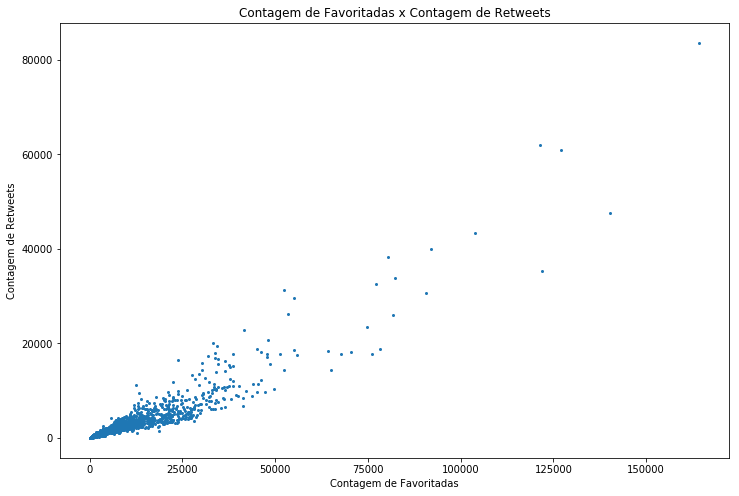

In [361]:
chart = twitter_archive_master.copy()
chart = chart[['favorite_count', 'retweet_count']]
chart['favorite_count'] = twitter_archive_master.favorite_count
chart['retweet_count'] = twitter_archive_master.retweet_count
plt.figure(figsize=(12, 8))
plt.xlabel('Contagem de Favoritadas')
plt.ylabel('Contagem de Retweets')
plt.plot(chart.favorite_count, chart.retweet_count, 
           linestyle='', marker='o', markersize=2)
plt.title('Contagem de Favoritadas x Contagem de Retweets');

Na representação gráfica acima podemos verificar a tendência de que quanto maior a quantidade de Favoritadas, maior será também a quantidade de retweets, eles são diretamente proporcionais.

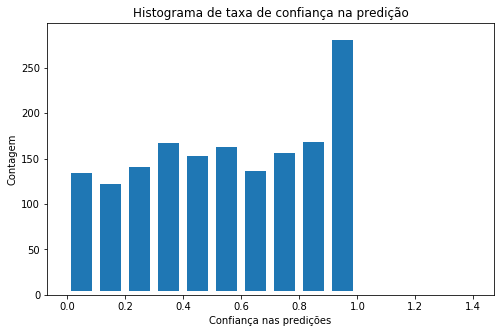

In [367]:
# Ratings
plt.figure(figsize = (8, 5))
plt.xlabel('Confiança nas predições')
plt.ylabel('Contagem')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4]
plt.hist(x = twitter_archive_master.prediction_confidence, 
         edgecolor='white', linewidth=8, bins = bins)
plt.title('Histograma de taxa de confiança na predição');

In [369]:
len(twitter_archive_master[twitter_archive_master.prediction_confidence > 0.9]), len(twitter_archive_master[twitter_archive_master.prediction_confidence.isnull()])

(285, 304)

In [105]:
len(twitter_archive_master[twitter_archive_master.prediction_confidence > 0.8]), len(twitter_archive_master)

(458, 1967)

Tivemos uma distribuição bem uniforme em relação a taxa de confiança nas predições, cada uma teve uma contagem entre 200 e 100 entradas, exceto entre 0.9 e 1 que tivemos 285 entradas, e as imagens que não tiveram previsão alguma que chegaram ao número de 304 entradas.